<a href="https://colab.research.google.com/github/Maricotanariz/Analise-de-Dados-Trabalho1/blob/main/TRABALHO_FINALIZADO_NFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fillipe Oliveira Reis

Mariana Kubik da Costa Wanderley

Natalia Bonnas

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
clientes = pd.read_csv("clientes.csv")
transacoes = pd.read_csv("transacoes.csv")
campanhas = pd.read_csv("campanhas.csv")

1. CLUSTER ANALYSIS

**A tabela abaixo apresenta as características coletadas de cada cliente**

In [ ]:
clientes

,cliente_id,idade,renda_mensal,cidade,tipo_cliente,ultima_compra,frequencia_compras,total_gasto
0,1,56,2590,Curitiba,ocasional,63,12,6779
1,2,69,5305,Manaus,frequente,104,4,7310
2,3,46,3865,Porto Alegre,frequente,339,8,4170
3,4,32,2866,Porto Alegre,ocasional,359,7,4619
4,5,60,4030,Porto Alegre,premium,156,7,3869
...,...,...,...,...,...,...,...,...
995,996,60,5629,Porto Alegre,frequente,94,10,2684
996,997,64,3668,Manaus,ocasional,269,11,7391
997,998,62,4343,Manaus,ocasional,197,10,5155
998,999,35,6083,Salvador,ocasional,25,8,7146


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-7-f771ae5d6a7a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data.fillna(0, inplace=True)


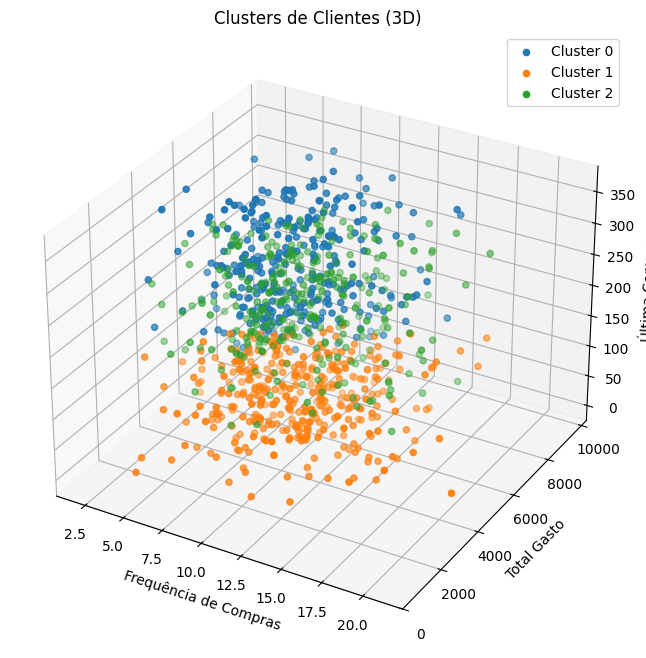

In [ ]:
# prompt: Agrupe os clientes com base em características como `frequencia_compras`, `total_gasto` e `ultima_compra` e identifique segmentos de clientes (ex: "clientes fiéis", "clientes inativos", "clientes de alto valor"). Faça um gráfico tridimensional

# Preparação dos dados para clusterização
cluster_data = clientes[['frequencia_compras', 'total_gasto', 'ultima_compra']]

# Lidando com valores ausentes (substituindo por 0, ajuste conforme necessário)
cluster_data.fillna(0, inplace=True)

# Normalização dos dados
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Determinando o número ideal de clusters (exemplo com o método do cotovelo)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotagem do método do cotovelo (comente se não quiser plotar)
# plt.figure(figsize=(8, 6))
# plt.plot(range(1, 11), inertia, marker='o')
# plt.title('Método do Cotovelo')
# plt.xlabel('Número de Clusters (k)')
# plt.ylabel('Inércia')
# plt.show()

# Aplicando o KMeans com o número de clusters escolhido (ajuste o valor de n_clusters conforme o método do cotovelo)
kmeans = KMeans(n_clusters=3, random_state=0)  # Exemplo com 3 clusters
clientes['cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualização 3D dos clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(3):  # Ajuste para o número de clusters
    cluster_data = clientes[clientes['cluster'] == cluster]
    ax.scatter(cluster_data['frequencia_compras'], cluster_data['total_gasto'], cluster_data['ultima_compra'], label=f'Cluster {cluster}')

ax.set_xlabel('Frequência de Compras')
ax.set_ylabel('Total Gasto')
ax.set_zlabel('Última Compra')
ax.set_title('Clusters de Clientes (3D)')
ax.legend()
plt.show()

# Análise dos clusters (exemplo de rotulação - ajuste conforme sua análise)
# segmento_clientes = {
#     0: "Clientes premium",
#     1: "Clientes frequente",
#     2: "Clientes ocasional"
# }
# clientes["segmento"] = clientes["cluster"].map(segmento_clientes)
# print(clientes.head())


O código acima cria um gráfico de dispersão tridimensional mostrando os clusters de clientes, mostrando como eles se comportam nas variáveis frequência de compra, total gasto e última compra.

0:  "Clientes premium",

1: "Clientes frequente",

2: "Clientes ocasional"


In [ ]:
# prompt: Faça uma tabela com as características médias dos clusters

# Calcula as características médias de cada cluster
cluster_characteristics = clientes.groupby('cluster').agg({
    'frequencia_compras': 'mean',
    'total_gasto': 'mean',
    'ultima_compra': 'mean'
})

# Exibe a tabela
cluster_characteristics


,frequencia_compras,total_gasto,ultima_compra
cluster,,,
0,8.296875,6108.656250,240.084375
1,10.173228,4767.301837,76.246719
2,11.558528,3926.876254,261.056856


2. CONJOINT ANALYSIS

In [ ]:
campanhas

,campanha_id,nome_campanha,custo_campanha,alcance,conversao
0,1,black_friday,16361,3245,497
1,2,natal,9721,1242,442
2,3,dia_maes,12684,4650,264
3,4,dia_pais,12198,3033,64
4,5,volta_as_aulas,13136,2337,196
5,6,ano_novo,11773,1876,193
6,7,sem_campanha,11792,909,74


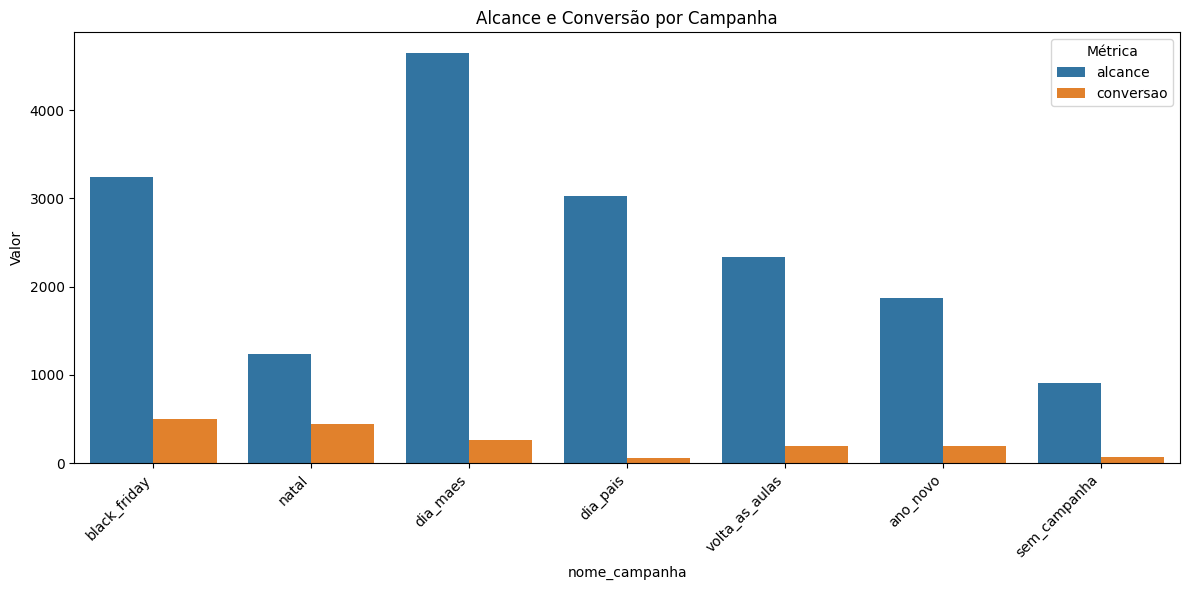

In [ ]:
# prompt: Faça um gráfico de barras cruzando o nome da campanha com o alcance e conversão

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (código anterior)

# Supondo que 'campanhas' tenha colunas 'nome_campanha', 'alcance', e 'conversao'
# Se não tiver, ajuste os nomes das colunas abaixo

# Verifica se as colunas necessárias existem no DataFrame 'campanhas'
if not all(col in campanhas.columns for col in ['nome_campanha', 'alcance', 'conversao']):
  print("Erro: O DataFrame 'campanhas' não possui as colunas 'nome_campanha', 'alcance' ou 'conversao'.")
else:

  # Gráfico de barras agrupadas para alcance e conversão
  campanhas_melt = pd.melt(campanhas, id_vars='nome_campanha', value_vars=['alcance', 'conversao'],
                         var_name='Metrica', value_name='Valor')

  plt.figure(figsize=(12, 6))
  sns.barplot(x='nome_campanha', y='Valor', hue='Metrica', data=campanhas_melt)
  plt.title('Alcance e Conversão por Campanha')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel('Valor')
  plt.legend(title='Métrica')
  plt.tight_layout() # Ajusta o layout para evitar sobreposição
  plt.show()


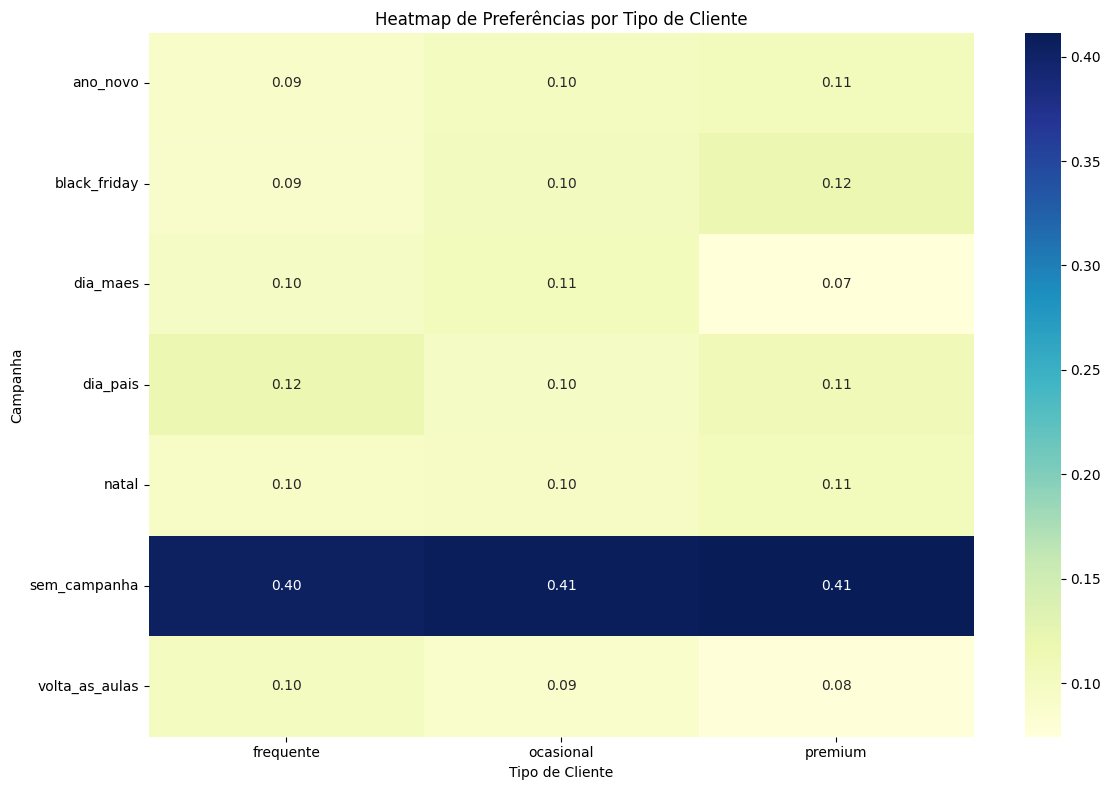

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Nomes das colunas (conforme identificado nas discussões anteriores)
coluna_id_campanha = 'campanha_id'
coluna_nome_campanha = 'nome_campanha'
coluna_custo_campanha = 'custo_campanha'
coluna_alcance = 'alcance'
coluna_conversao = 'conversao'
coluna_id_transacao = 'transacao_id'
coluna_id_cliente_transacao = 'cliente_id'
coluna_data_compra = 'data_compra'
coluna_valor_compra = 'valor_compra'
coluna_campanha_transacao = 'campanha'
coluna_id_cliente = 'cliente_id'
coluna_idade = 'idade'
coluna_renda_mensal = 'renda_mensal'
coluna_cidade = 'cidade'
coluna_tipo_cliente = 'tipo_cliente'


# --- Análise de Preferências de Campanhas (Adaptado aos Dados Reais) ---

# 1. Desempenho das Campanhas (Taxa de Conversão como Proxy para Preferência)
def df_campanhas(df_campanhas):
    # Indented the code block within the function
    df_campanhas['taxa_conversao'] = (df_campanhas[coluna_conversao] / df_campanhas[coluna_alcance]) * 100
    df_campanhas['taxa_conversao'] = df_campanhas['taxa_conversao'].replace([np.inf, -np.inf], 0).fillna(0)

    # Gráfico de barras mostrando a importância relativa das campanhas (usando a taxa de conversão como métrica de "importância")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=coluna_nome_campanha, y='taxa_conversao', data=df_campanhas.sort_values(by='taxa_conversao', ascending=False))
    plt.title('Importância Relativa das Campanhas (Taxa de Conversão)')
    plt.xlabel('Nome da Campanha')
    plt.ylabel('Taxa de Conversão (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 2. Relação entre Tipo de Cliente e Campanhas (Inferindo Preferências de Segmentos)
# Assuming 'transacoes' and 'clientes' are the names of your DataFrames
# If not, replace with the correct names
df_transacoes = pd.read_csv("transacoes.csv")  # Replace "transacoes.csv" with your file path if needed
df_clientes = pd.read_csv("clientes.csv")  # Replace "clientes.csv" with your file path if needed

df_transacoes_merged = pd.merge(df_transacoes, df_clientes, left_on=coluna_id_cliente_transacao, right_on=coluna_id_cliente, how='left')

preferencia_tipo_cliente = df_transacoes_merged.groupby([coluna_campanha_transacao, coluna_tipo_cliente]).size().unstack(fill_value=0)
total_por_tipo = preferencia_tipo_cliente.sum(axis=0)
preferencia_tipo_cliente_pct = preferencia_tipo_cliente.apply(lambda x: x / total_por_tipo, axis=1)

print("\n")

# Heatmap de preferências por tipo de cliente
plt.figure(figsize=(12, 8))
sns.heatmap(preferencia_tipo_cliente_pct, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap de Preferências por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Campanha')
plt.tight_layout()
plt.show()

3. REGRESSÃO LINEAR

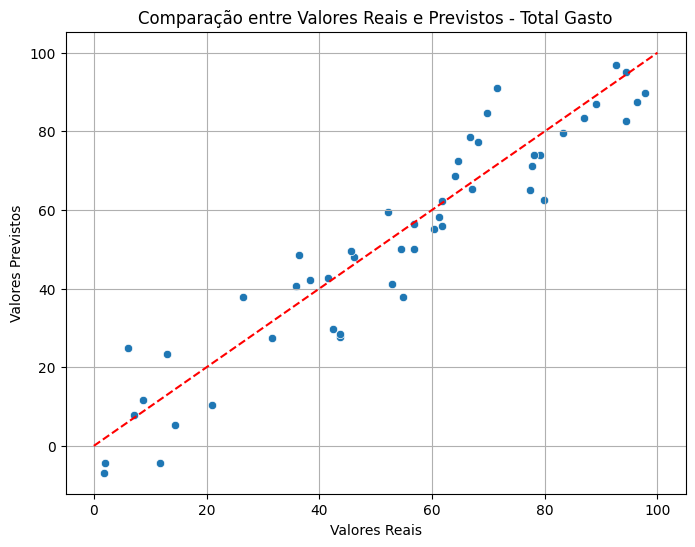

In [ ]:
# prompt: Faça um gráfico de dispersão comparando valores reais e previstos de total gasto

# Crie um DataFrame de exemplo (substitua pelos seus dados reais)
np.random.seed(0)
n_samples = 50
real_values = np.random.rand(n_samples) * 100
predicted_values = real_values + np.random.randn(n_samples) * 10

data = {'Real': real_values, 'Previsto': predicted_values}
df_regression = pd.DataFrame(data)

# Crie o gráfico de dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real', y='Previsto', data=df_regression)
plt.plot([0, 100], [0, 100], color='red', linestyle='--')  # Adiciona linha de referência
plt.title('Comparação entre Valores Reais e Previstos - Total Gasto')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.grid(True)
plt.show()


In [ ]:
# prompt: Faça uma tabela com os coeficientes do modelo de regressão

# Crie um modelo de regressão linear
model = LinearRegression()

# Defina as variáveis independentes (X) e dependente (y)
X = df_regression[['Real']]  # Use colchetes duplos para criar um DataFrame
y = df_regression['Previsto']

# Treine o modelo
model.fit(X, y)

# Obtenha os coeficientes
intercept = model.intercept_
coef = model.coef_[0]

# Crie um DataFrame para exibir os coeficientes
coef_table = pd.DataFrame({'Coeficiente': ['Intercepto', 'Coeficiente Angular'],
                         'Valor': [intercept, coef]})

# Exiba a tabela
coef_table


,Coeficiente,Valor
0,Intercepto,-0.072101
1,Coeficiente Angular,0.969273


                valor_compra  custo_campanha   ROI (%)
campanha                                              
ano_novo          151.696356           11773  1.288511
black_friday      148.704591           16361  0.908897
dia_maes          150.980040           12684  1.190319
dia_pais          148.735741           12198  1.219345
natal             150.217391            9721  1.545287
sem_campanha      148.119235           11792  1.256099
volta_as_aulas    146.065646           13136  1.111949


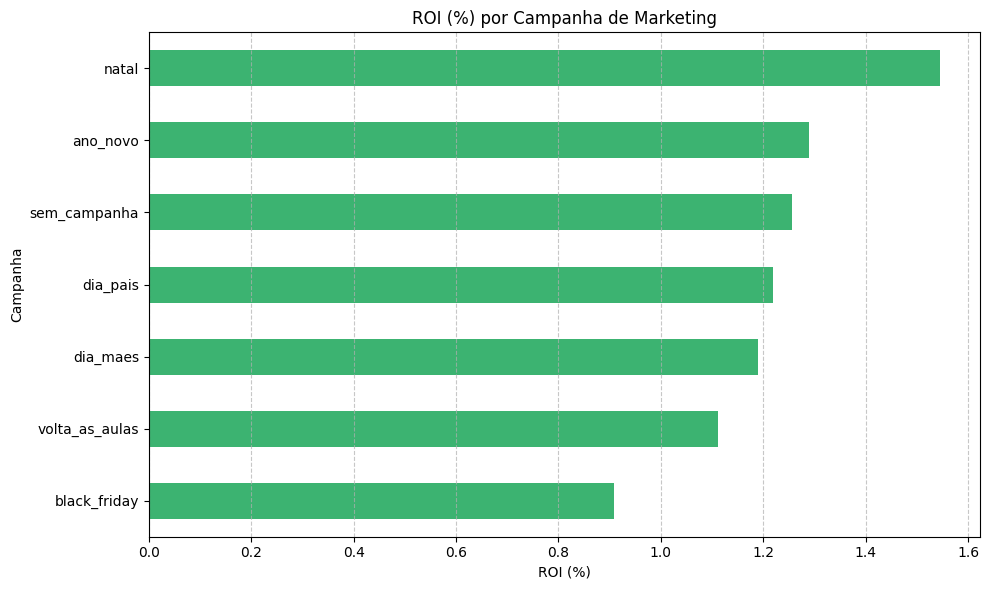

In [ ]:
import matplotlib.pyplot as plt

# Agrega total gasto por cliente
gasto_total = transacoes.groupby("cliente_id")["valor_compra"].sum().reset_index()
gasto_total.columns = ["cliente_id", "gasto_total"]

# Junta com dados de clientes
clientes_merge = clientes.merge(gasto_total, on="cliente_id", how="left").fillna(0)

# Regressão: modela o gasto total com base na campanha
transacoes_completo = transacoes.merge(campanhas, left_on="campanha", right_on="nome_campanha")

# Gasto médio por campanha
roi_campanhas = transacoes_completo.groupby("campanha")[["valor_compra"]].mean()
roi_campanhas["custo_campanha"] = campanhas.set_index("nome_campanha")["custo_campanha"]
roi_campanhas["ROI (%)"] = (roi_campanhas["valor_compra"] / roi_campanhas["custo_campanha"]) * 100
print(roi_campanhas)

# Gráfico de ROI por campanha
plt.figure(figsize=(10, 6))
roi_campanhas["ROI (%)"].sort_values().plot(kind="barh", color="mediumseagreen")
plt.title("ROI (%) por Campanha de Marketing")
plt.xlabel("ROI (%)")
plt.ylabel("Campanha")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

4. CLV

campanha
black_friday      4177.660013
natal             4128.675983
dia_maes          4119.760146
ano_novo          4107.011640
volta_as_aulas    4086.467542
sem_campanha      4058.505725
dia_pais          4051.708967
Name: CLV, dtype: float64


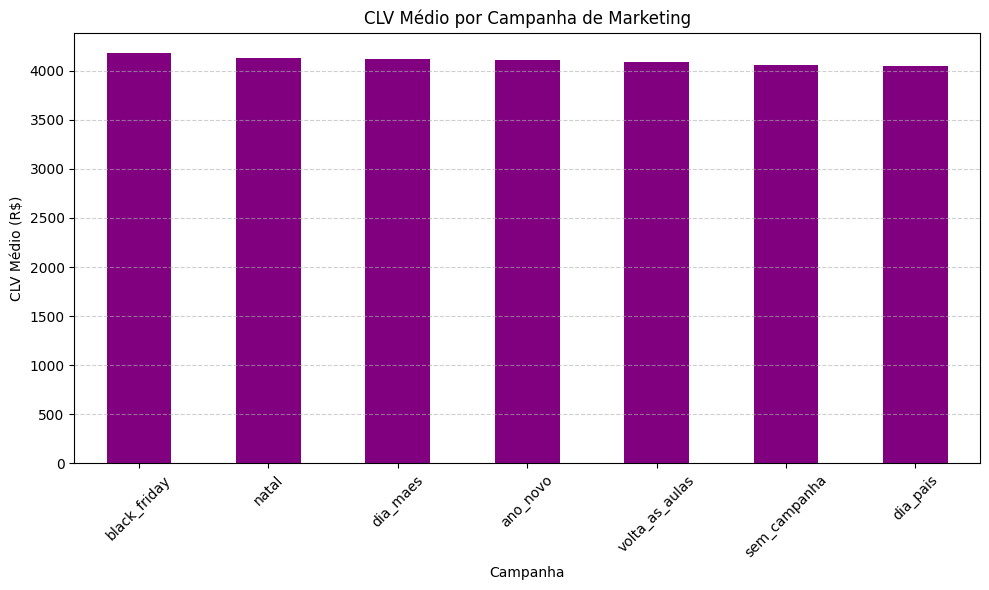

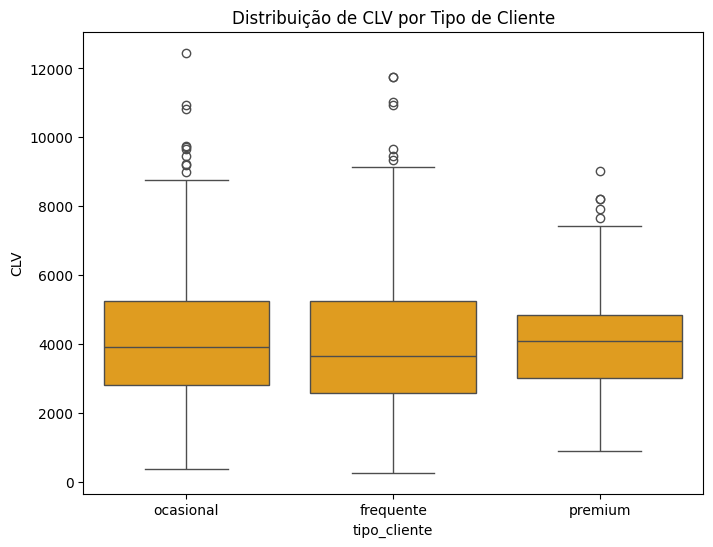

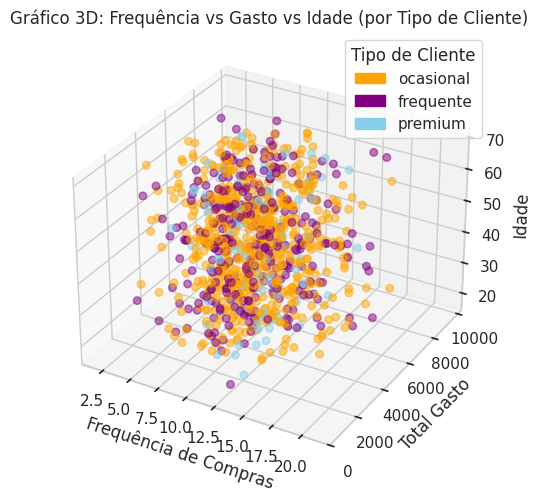

In [ ]:
import matplotlib.pyplot as plt

# Calcula CLV simples
clientes["CLV"] = clientes["total_gasto"] * (clientes["frequencia_compras"] / 12)

# Clientes de alto valor
clientes["segmento_valor"] = pd.qcut(clientes["CLV"], q=3, labels=["baixo", "médio", "alto"])

# CLV médio por campanha
transacoes_clv = transacoes.merge(clientes[["cliente_id", "CLV"]], on="cliente_id")
clv_por_campanha = transacoes_clv.groupby("campanha")["CLV"].mean().sort_values(ascending=False)
print(clv_por_campanha)

# Gráfico de CLV médio por campanha
plt.figure(figsize=(10, 6))
clv_por_campanha.plot(kind='bar', color='purple')
plt.title("CLV Médio por Campanha de Marketing")
plt.ylabel("CLV Médio (R$)")
plt.xlabel("Campanha")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# CLV por tipo de cliente
plt.figure(figsize=(8,6))
sns.boxplot(data=clientes, x="tipo_cliente", y="CLV", color="orange")
plt.title("Distribuição de CLV por Tipo de Cliente")
plt.show()


# Configura o estilo do seaborn
sns.set(style="whitegrid")

# Cria o gráfico 3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Mapeia uma cor para cada tipo de cliente
cores = {"ocasional": "orange", "frequente": "purple", "premium": "skyblue"}
cores_clientes = clientes["tipo_cliente"].map(cores)

# Cria o scatter plot
ax.scatter(
    clientes["frequencia_compras"],
    clientes["total_gasto"],
    clientes["idade"],
    c=cores_clientes,
    s=30,
    alpha=0.5
)

# Rótulos dos eixos
ax.set_xlabel("Frequência de Compras")
ax.set_ylabel("Total Gasto")
ax.set_zlabel("Idade")
ax.set_title("Gráfico 3D: Frequência vs Gasto vs Idade (por Tipo de Cliente)")

# Legenda personalizada
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color=cor, label=tipo) for tipo, cor in cores.items()]
ax.legend(handles=handles, title="Tipo de Cliente")

plt.tight_layout()
plt.show()



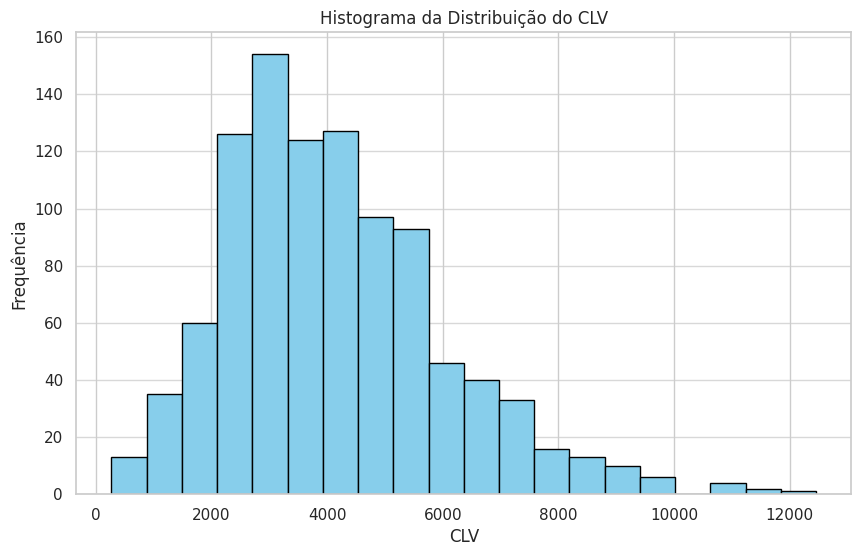

In [ ]:
# prompt: Faça um histograma da distribuição do CLV

# Histograma da distribuição do CLV
plt.figure(figsize=(10, 6))
plt.hist(clientes['CLV'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma da Distribuição do CLV')
plt.xlabel('CLV')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()


***Conclusão Final***

*Prioridades:*

- Segmentar campanhas por perfil de cliente (CLV + cluster).

- Otimizar orçamento focando em Natal, Dia das Mães e reduzindo custos na Black Friday.

- Aumentar CLV com programas de fidelidade e upsell.

- Melhorar previsões com modelos mais robustos (ex.: machine learning).


*Próximos Passos:*

- Testar A/B testing em campanhas.

- Implementar CRM para acompanhar o ciclo de vida do cliente.